### Datasheet Ultrasonic sensor (HY-SRF05)

#### Generali
I dettagli significativi sono i seguenti:
- Sound Frequency: 40 kHz
- Measurament range: 2cm to 4.5m
- Measurament resolution: 0.3cm

#### Oscillatori
- L'oscillatore T si occupa di trasmettere un segnale composto da un treno di 8 impulsi
- L'oscillatore R si occupa di ricevere segnale dopo che questo è rimbalzato in una superficie

Un clock si occupa di misura il tempo di volo, un treno da 8 impulsi è tale perché è riconoscibile da altri segnali


#### Misura:
Invia un impulso di 10 uS al sensore sul pin di trigger. Il sensore invierà automaticamente un'onda a 40 kHz.
- Inizia a monitorare l'uscita dal pin Echo e
- Quando il pin Echo passa ad alto, avvia un timer.
- Quando il pin Echo passa ad basso, registra il tempo trascorso dal timer e utilizza la seguente formula di conversione:

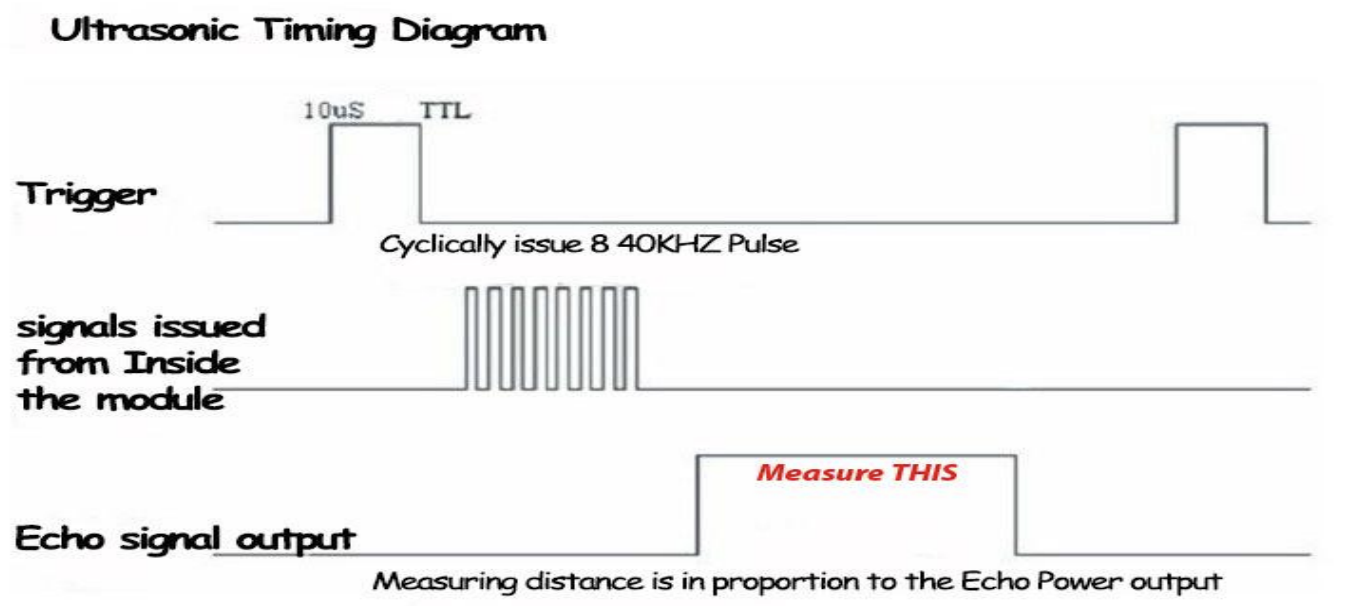

In [2]:
from IPython.display import Image, display
display(Image("Media/Misura Ultrasonic sensor.png",width=500))

------------
### Datasheet Ultrasonic transducer (SHT-USW-1)

#### Generali

I dettagli significativi sono i seguenti:

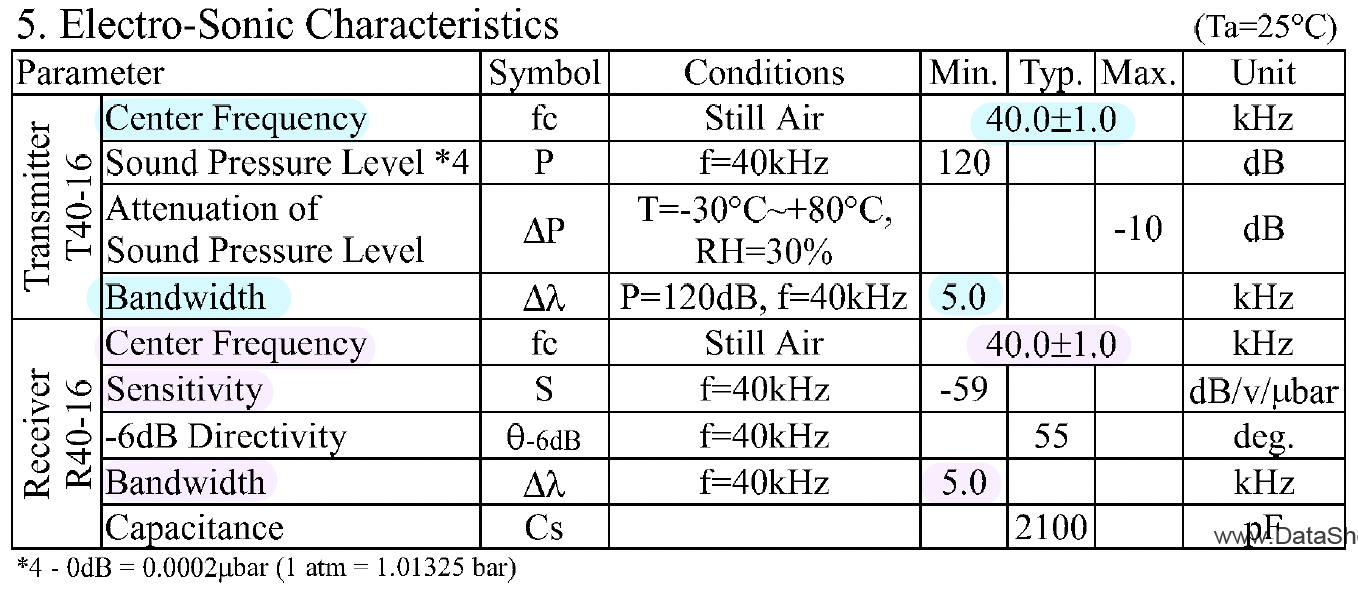

In [3]:
display(Image("Media/Datasheet Ultrasonic transducer.png",width=500))

----

# Misura di distanza

------

# Misura dell'effetto doppler

### 1) Setting di misura

Disponiamo nel carrello mobile il trasmettitore (destra) e fissiamo il ricevitore nel fondo (sinistra) in posizione trasversa per evitare auto-oscillazioni tra le onde che sbattendo dal trasmissore al ricevitore ritornino indietro creando battimenti.

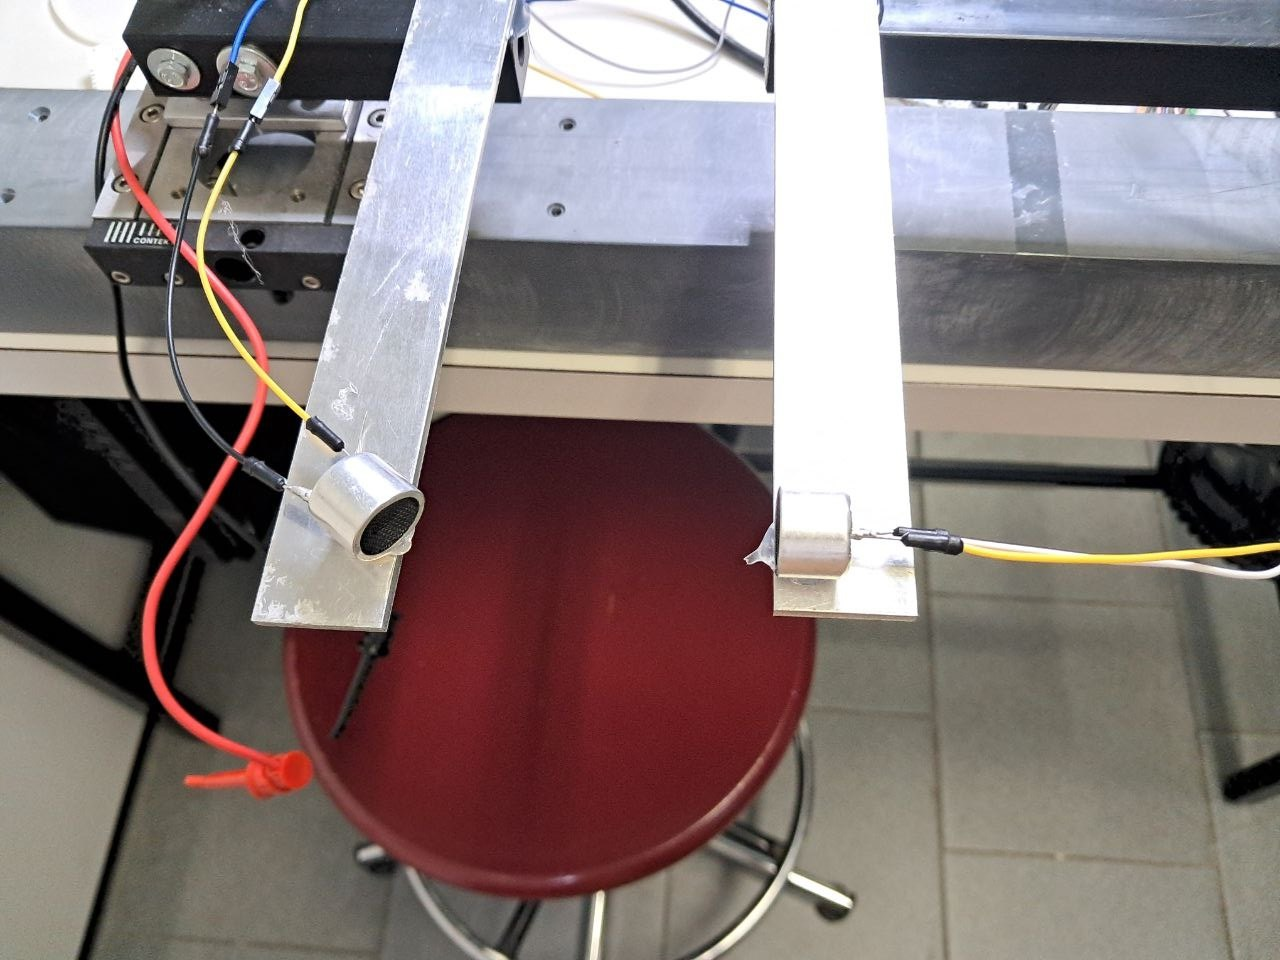

In [4]:
display(Image("Media/Doppler_strumenti.jpg",width=500))

### 2) Stabiliamo un tempo di campionamento 

sapendo che:
- La frequenza di risonanza è a $\nu =$ 40 khz
- La velocità del suono è $v_s =$ 343.4 m/s
- La lunghezza della griglia è $x =$ 20 cm

L'effetto doppler ha una frequenza:
$\qquad 
\displaystyle \nu' = \nu \frac{v_s}{v_s \pm v\cos(\theta)} \quad $ "+" se si sta avvicinando, "-" se si sta allontanando

Ma dato che abbiamo da fare una fft sul segnale in uscita, dobbiamo determinare un intervallo nei tempi per ottenere una determinata grandezza di griglia nelle frequenze

$\begin{cases}
\displaystyle T_\text{grid} = \frac{x}{v}
\\
\nu_\text{grid} = 1/T_\text{grid}
\end{cases}$
tale da essere molto più piccola della variazione in frequeza $\qquad \Delta\nu = \nu'-\nu \gg \nu_\text{grid}$

### 3) Frequenza di risonanza 

Individuiamo la frequenza di risonanza da fermo (senza doppler) per confrontarla come standard con il segnale di doppler fissando un angolo $\theta$ = $\pi$/4

Effettuando un bode osserviamo una freaquenza di risonanza di $40.968$ khz mentre la nominale è a $40$ khz
Quindi teoricamente dovremmo vedere una variazionione in frequenza: $\Delta\nu = 1.19$ hz con una frequenza di griglia $\Delta\nu_\text{grid} = 0.05$ hz impostando una velocità di scorrimento di $v = 1$ cm/s





In [12]:
import numpy as np

ν = 40.968e3  # Hz
V = 1e-2      # m/s (velocità sorgente)
V_sound = 343.4  # m/s

def doppler_classico(ν, V, V_sound, θ, direction="closer"):
    if direction=="further": d = -1
    else: d = 1
    
    ν_prime = ν * V_sound / (V_sound + d*V * np.cos(θ))
    X_grid = 20e-2  # m
    T_grid = X_grid / V
    ν_grid = 1 / T_grid
    return ν_prime, ν_grid

ν_prime, ν_grid = doppler_classico(ν, V, V_sound, θ=np.pi/4, direction="closer")
dν = ν - ν_prime
print(f"∆ν = {dν:.6f} Hz, ν_grid = {ν_grid:.2f} Hz")

ν_prime_1, ν_grid_1 = doppler_classico(ν, V, V_sound, θ=0, direction="closer")
dν_1 = ν - ν_prime_1
print(f"∆ν = {dν_1:.6f} Hz, ν_grid = {ν_grid_1:.2f} Hz")


∆ν = 0.843569 Hz, ν_grid = 0.05 Hz
∆ν = 1.192976 Hz, ν_grid = 0.05 Hz


Plot di bode:

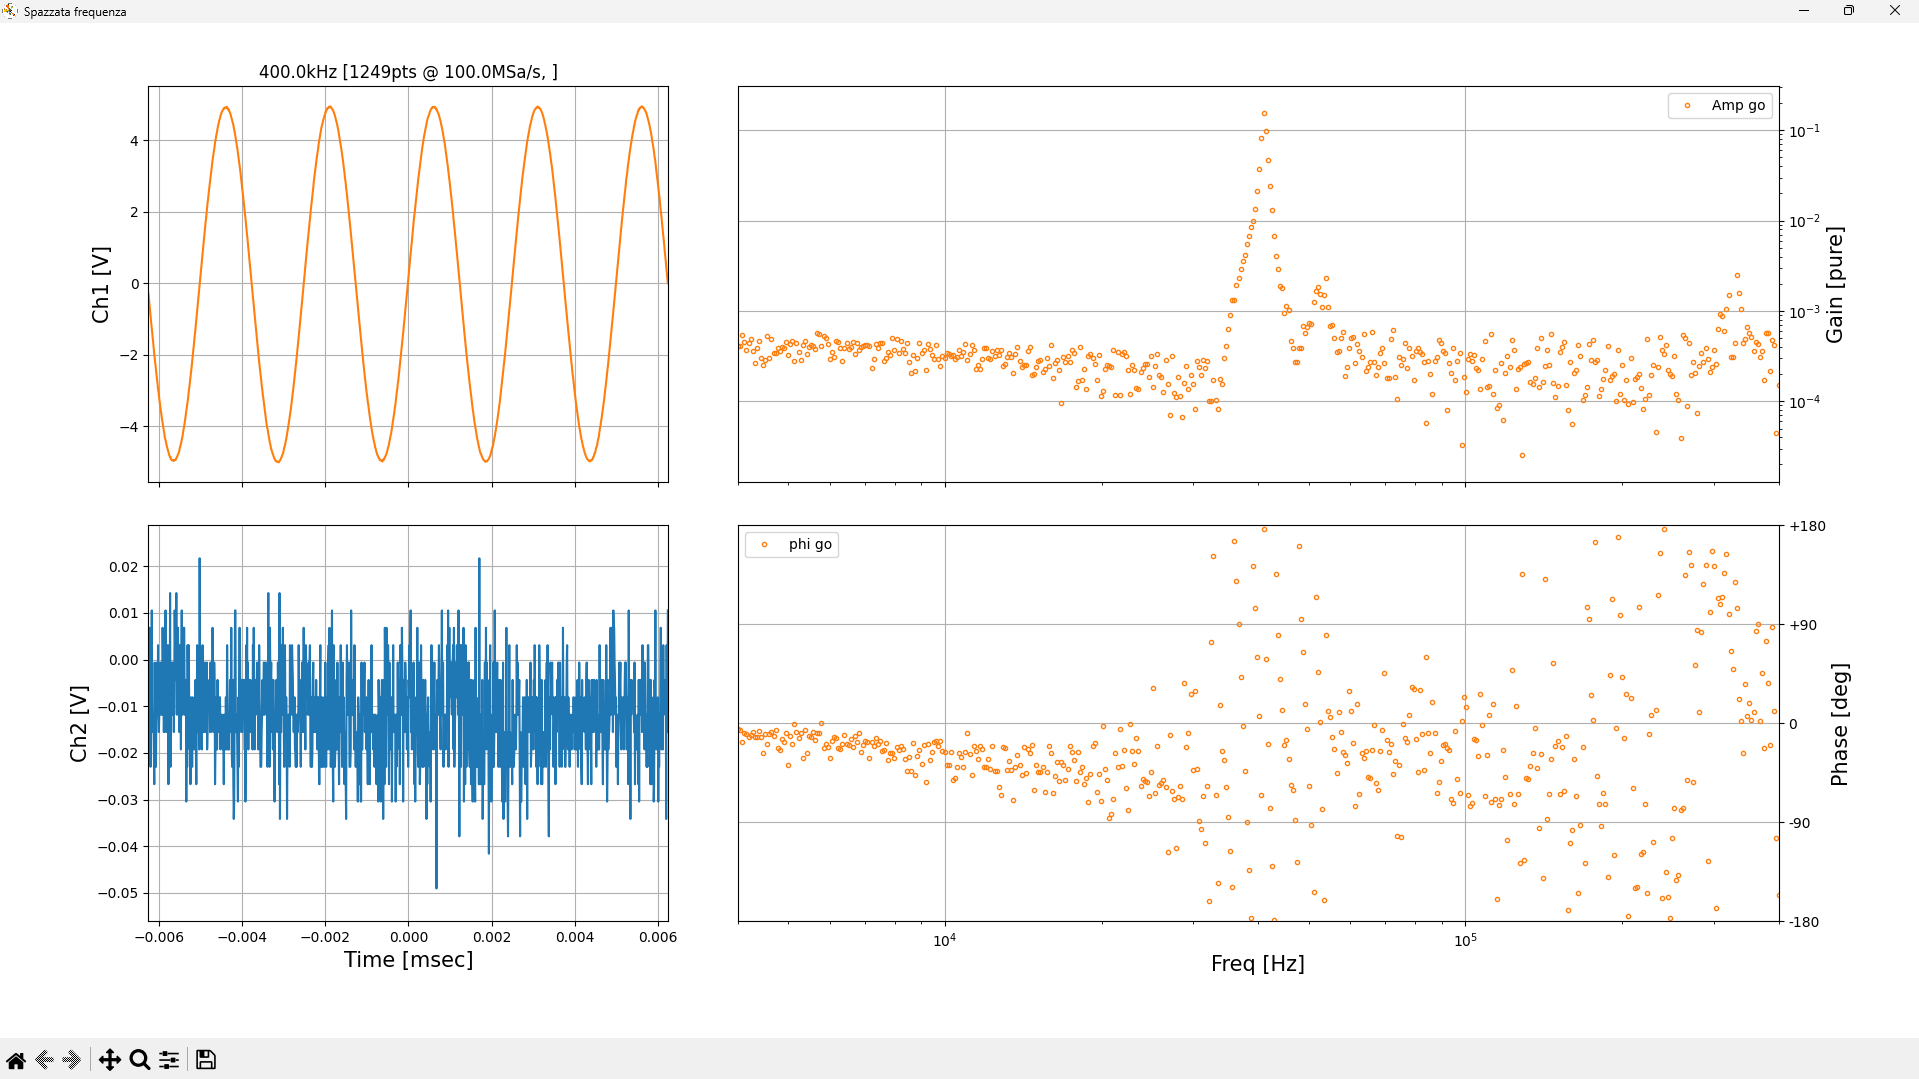

In [7]:
display(Image("Media/bode.png",width=900))